Saving IBM.csv to IBM (14).csv
  CUSTOMER_id  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV    Male   78       No            Yes      No         No   
1  7495-OOKFY  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ  Female   80       No            Yes     Yes        Yes   

   Number of Dependents        Country       State  ...  \
0                     0  United States  California  ...   
1                     1  United States  California  ...   
2                     3  United States  California  ...   
3                     1  United States  California  ...   
4                     1  United States  California  ...   

  Total Extra Data Charges  Total Long Distance Charges  Total Revenue  \
0                       20                         0.00          59.65   
1                        0 

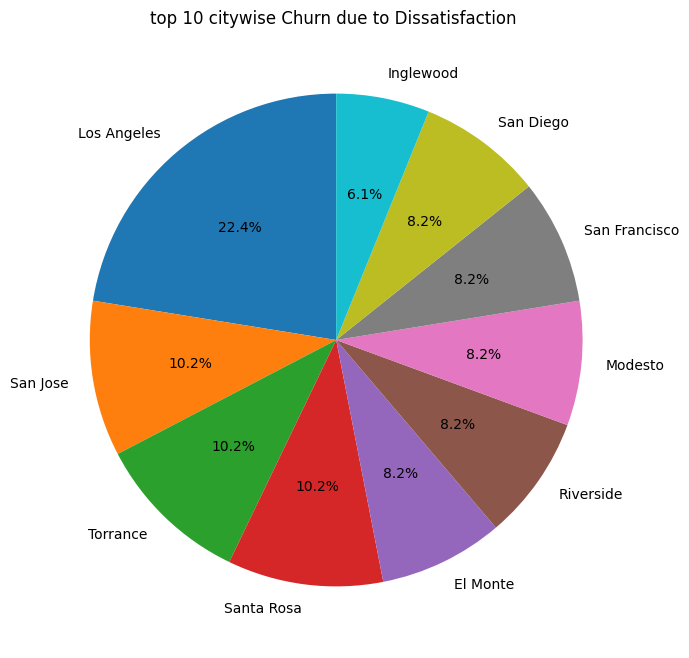

In [16]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'IBM (3).csv' is the file you uploaded and want to use
file_name = list(uploaded.keys())[0]
IBM = pd.read_csv(file_name)
print(IBM.head())
print(IBM.describe())
print(IBM.shape)

male_customer = IBM[IBM['Gender']=='Male']
female_customer=IBM[IBM['Gender']=='Female']
print(male_customer.head(4))
print(female_customer.head(4))

dissatisfied_churn = IBM[(IBM['Churn Category'].str.contains('Dissatisfaction', case=False, na=False))]

# Step 5: Get the total count of such customers
total_dissatisfied_churn = dissatisfied_churn.shape[0]

print("Total number of customers who churned due to dissatisfaction:", total_dissatisfied_churn)

citywise_counts = dissatisfied_churn.groupby('City')['CUSTOMER_id'].count().reset_index()

# Step 4: Sort (optional, for clean display)
citywise_counts = citywise_counts.sort_values(by='CUSTOMER_id', ascending=False).head(10)

# Step 5: Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    citywise_counts['CUSTOMER_id'],
    labels=citywise_counts['City'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('top 10 citywise Churn due to Dissatisfaction ')
plt.show()



